# COGS 108 - Analysis of the Impact of Big Five Personality Traits on Academic Performance 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

There has been numerous studies comprehending the relationship between personality and academic behaviors, and commonly, researchers use the *Big Five* personality traits as a model. The Big Five consists of *openness, conscientiousness, extraversion, agreeableness, neuroticism*. These personality factors are often described in the following by Verywell Mind blog [3]:

- Openness refers to how willing a person is to exploring new experiences, thoughts, or interests. According to the blog, people who are high in openness tend to be more adventurous.
- Conscientiousness is a tendency to display self-discipline, act dutifully, and strive for achievement against measures or outside expectations. People high in conscientiousness tend to be more detail oriented. 
- Extraversion is characterized by sociability and emotional expressiveness. People high in extraversion often gain energy from being around others. 
- The agreeableness trait reflects individual differences in general concern for social harmony and how people-oriented a person is. Those with high agreeableness are expected to be more cooperative than competitive.
- Neuroticism refers to how likely a person is to react to negative situations. People who are high in neuroticism are often more prone to stress and anxiety.

# Names

- Ben Liou
- Fanqi Lin
- Tasnia Jamal
- Kendrick Nguyen

<a id='research_question'></a>
# Research Question

*Is there a correlation between students' Big Five personality traits (i.e. openness, conscientiousness, extraversion, agreeableness, and neuroticism) and academic performance?*

<a id='background'></a>

## Background & Prior Work

Many can agree that the greatest benefit to attending school is an eduction. Yet, school also yields other invaluable benefits, such as connections and human development. From personal experience, these benefits are factors that can aid in academic performance beyond textbook studying. For instance, a student with many friends is more likely to reach out for help or form a group to advance their studying.

Fundamentally, all students learn at different paces and perform best in environments which suit their personalities [2]. As some studies have deduced, personality can predict academic achievement, as higher extraversion can positively associate with GPA [1].

Our topic of interest is finding individual factors, beyond purely studying, that potentially influences one’s academic performance. Specifically, we chose to scale these factors into Big Five personalities, as they have been widely used as predictors in educational studies [1]. These five factors are referred to as neuroticism, extraversion, openness to experience, conscientiousness, and agreeableness.

---

References:

[1] Rosito, Asina Christina. “The Big Five Personality Traits, Self-regulated Learning, and Academic Achievement.” Retrieved 5 March 2023, from https://www.scitepress.org/Papers/2018/85910/85910.pdf 

[2] Gandhi, Vandana. “Big Five Personality Traits and Academic Performance of Post Graduate Students.” Retrieved 5 March 2023, from https://www.researchgate.net/publication/329446960_Big_Five_Personality_Traits_and_Academic_Performance_of_Post_Graduate_Students 

[3] Cherry, Kendra. “What Are the Big 5 Personality Traits?” Verywell Mind, Verywell Mind, 11 Mar. 2023, https://www.verywellmind.com/the-big-five-personality-dimensions-2795422.

# Hypothesis


We hypothesize that conscientiousness and extraversion will strongly correlate to academic performance compared to the other Big Five personality traits. We assume having a disciplined and collaborative personality is a good outlook in the education setting, as suggested from our research.

# Dataset(s)

## *Dataset 1*

- Dataset Name: Engineering Graduate Salary Prediction
- Link to the dataset: https://www.kaggle.com/datasets/manishkc06/engineering-graduate-salary-prediction
- Number of observations: 2998 students
- Description: Originally used to predict the salary of an engineering graduate, the dataset provides labels, such as College GPA and AMCAT Personality test scores. The forementioned labels will be used to measure academic performance and Big Five personality factors.

## *Dataset 2*

- Dataset Name: Correlation of Personality Traits & GPA for Jordanian Medical Students
- Link to the dataset: https://data.mendeley.com/datasets/5rwpwr9rf2/1
- Number of observations: 307 students
- Description: A complete dataset on Hashemite University, Jordan's medical students, identifying their Big Five Model personality traits and College GPA. We plan to use this dataset in combination as it already yields the same labels as the first dataset.


# Setup

Import the following packages. To get all the packages run `pip install -r requirements.txt`

In [1]:
# Import pandas, numpy, patsy
import pandas as pd
import numpy as np
import patsy

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style='white', rc={'lines.linewidth': '0.3'})

# matplotlib imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# scikit-learn imports
from sklearn import linear_model

# statsmodels imports
import statsmodels.api as sm

from itertools import combinations

Create an indexing constant for all Big Five Personalities

In [2]:
BIG_FIVE = ['openness',
            'conscientiousness', 
            'extraversion', 
            'agreeableness',
            'neuroticism']

Create an alpha value constant for testing statistical significance

In [3]:
ALPHA = 0.05

# Data Cleaning

We broke down the data cleaning into two parts respectively for the `Engineering Graduate Salary Prediction` and `Correlation of Personality Traits & GPA for Jordanian Medical Students` datasets. The same process follows for both datasets where we:

1. Created a dataframe by exclusively selecting our labels of interest, `gender`, `gpa`, `openness`, `conscientiousness`, `extraversion`, `agreeableness`, and `neuroticism`.
2. Removed entries that contains any null (`NaN`) values
3. Standardized the `gender` and `gpa` labels to `m/f` values and `0.0 - 4.0` scaling respectively
4. Mapped each Big Five personality labels to percentiles relative to the dataset sample

Toggle `EXPORT_CSV` to `True` if you want to export the all cleaned datasets, else `False`

In [4]:
EXPORT_CSV = False

## Part I: Cleaning the Engineering Graduate Dataset, `engineering_df`

Read the first dataset `Engineering_graduate_salary.csv` and assign it to the variable `engineering_df`

In [5]:
engineering_df = pd.read_csv('data/raw_data/Engineering_graduate_salary.csv')

engineering_df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


According to Kaggle's summary, there are 34 columns in the dataset. However, our only columns of interest are only `collegeGPA` and the AMCAT Personality test scores labels. We can therefore slice our dataframe to only include our columns of interest.

In [6]:
# Output raw dataset columns
engineering_df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [7]:
# Save new dataframe with collegeGPA and the AMCAT Personality test scores labels
engineering_df = engineering_df[['Gender',
                                 'collegeGPA',
                                 'openess_to_experience', 
                                 'conscientiousness',
                                 'extraversion',
                                 'agreeableness', 
                                 'nueroticism']]

# Rename columns
engineering_df.columns = ['gender', 'gpa'] + BIG_FIVE

engineering_df.head()

,gender,gpa,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,f,73.82,0.2889,-0.1590,1.2396,0.3789,0.14590
1,m,65.00,-0.2859,1.1336,1.2396,0.0459,0.52620
2,m,61.94,-0.2875,0.5100,1.5428,-0.1232,-0.29020
3,m,80.40,0.4805,-0.4463,0.3174,0.2124,0.27270
4,f,64.30,0.1864,-1.4992,-1.0697,-0.7473,0.06223


Drop rows where ANY column has missing data `NaN`

In [8]:
raw_size = engineering_df.shape
engineering_df = engineering_df.dropna().reset_index(drop=True)

print(f'Original size: {raw_size}')
print(f'Filtered size: {engineering_df.shape}')

Original size: (2998, 7)
Filtered size: (2998, 7)


Notice that the GPA scaling is different with a <= 100.0 scale. These values are most likely percentages, thus we map these values to reflect our accustomed <= 4.0 scale.

In [9]:
gpa_scale = lambda x: (x * 4.0) / 100.0
engineering_df['gpa'] = engineering_df['gpa'].apply(gpa_scale)

engineering_df.head()

,gender,gpa,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,f,2.9528,0.2889,-0.1590,1.2396,0.3789,0.14590
1,m,2.6000,-0.2859,1.1336,1.2396,0.0459,0.52620
2,m,2.4776,-0.2875,0.5100,1.5428,-0.1232,-0.29020
3,m,3.2160,0.4805,-0.4463,0.3174,0.2124,0.27270
4,f,2.5720,0.1864,-1.4992,-1.0697,-0.7473,0.06223


The AMCAT Personality or Big Five scores are inconsistently scaled for this dataset. In addition, there is canonically no scaling for AMCAT exams. Yet, according the [AMCAT's portal](https://www.myamcat.com/help/amcat-scores-and-results/scores), a 'good score' is often weighted on percentile. Therefore, we can wrangle and map our personality scores into percentiles respectively within each column.

In [10]:
big_five = engineering_df.columns[2:]

# Loop through all big five personalities columns and map values to percentiles
for personality in big_five:
    engineering_df[personality] = engineering_df[personality].rank(pct = True)

<div class="alert alert-info">
Summary of  Engineering Graduate Cleaned Dataset
</div>

Written Description of `engineering_df` Column Labels:
- `gender`: Male `m` or female `f`
- `gpa`: Scaled college GPA ( out of 4.0 )
- `openess`: Big Five Openess percentile ( out of 1.0 )
- `conscientiousness`: Big Five Conscientiousness percentile ( out of 1.0 )
- `extraversion`: Big Five Extraversion percentile ( out of 1.0 )
- `agreeableness`: Big Five Agreeableness percentile ( out of 1.0 )
- `nueroticism`: Big Five Nueroticism percentile ( out of 1.0 )

In [11]:
engineering_df.head()

,gender,gpa,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,f,2.9528,0.637759,0.423115,0.912608,0.572048,0.622248
1,m,2.6000,0.401935,0.877085,0.912608,0.416111,0.745163
2,m,2.4776,0.365911,0.676451,0.957638,0.322382,0.455971
3,m,3.2160,0.719646,0.306371,0.606071,0.486991,0.667445
4,f,2.5720,0.599900,0.088893,0.125584,0.154436,0.591561


In [12]:
# Export cleaned dataset
if EXPORT_CSV:
    engineering_df.to_csv('data/cleaned_data/engineering_dataset.csv', index=False)

## Part II: Cleaning the Jordanian Medical Students Dataset, `medical_df`

Similarly, we will perform cleaning and wrangling for our Jordanian Medical Students Dataset, starting off with selecting our columns of interest. Read the second dataset `Data for Repository Personality and GPA Research.xlsx` and assign it to the variable `medical_df`

In [13]:
medical_df = pd.read_csv('data/raw_data/Data for Repository Personality and GPA Research.csv')

medical_df.head()

,No.,Corresponding Year,Gender,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,GPA,Unnamed: 9,Key: Gender 1 = Male; Gender 2 = Female,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1,2,2,0.725,0.644,0.556,0.950,0.84,3.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,2,0.400,0.867,0.689,0.625,0.52,2.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2,2,0.700,0.756,0.711,0.600,0.76,2.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,2,0.575,0.556,0.644,0.550,0.54,2.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2,2,0.575,0.911,0.800,0.625,0.78,3.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Output raw dataset columns
medical_df.columns

Index(['No.', 'Corresponding Year', 'Gender', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Neuroticism', 'Openness', 'GPA', 'Unnamed: 9',
       'Key: Gender 1 = Male; Gender 2 = Female', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [15]:
# Save new dataframe with GPA and Big Five personality test scores labels
medical_df = medical_df[['Gender',
                         'GPA',
                         'Openness',
                         'Conscientiousness', 
                         'Extraversion',
                         'Agreeableness',
                         'Neuroticism']]

# Rename columns
medical_df.columns = ['gender', 'gpa'] + BIG_FIVE

medical_df.head()

,gender,gpa,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,2,3.84,0.84,0.556,0.725,0.644,0.950
1,2,2.90,0.52,0.689,0.400,0.867,0.625
2,2,2.57,0.76,0.711,0.700,0.756,0.600
3,2,2.58,0.54,0.644,0.575,0.556,0.550
4,2,3.65,0.78,0.800,0.575,0.911,0.625


Drop rows where ANY column has missing data `NaN`

In [16]:
raw_size = medical_df.shape
medical_df = medical_df.dropna().reset_index(drop=True)

print(f'Original size: {raw_size}')
print(f'Filtered size: {medical_df.shape}')

Original size: (307, 7)
Filtered size: (307, 7)


For consistency, we need to standardize the `gender` column to either `m` or `f` similar to the `engineering_df` dataframe. Fortunately, the raw `Data for Repository Personality and GPA Research.csv` dataset provided us a key for `gender` labels. 

*Key: Gender 1 = Male; Gender 2 = Female*

In [17]:
medical_df['gender'] = medical_df['gender'].replace(1, 'm')
medical_df['gender'] = medical_df['gender'].replace(2,'f')

This dataset appears to already have <= 4.0 GPA sclaing. Thus, the next step is to convert the Big Five personality column values into percentiles as well for consistency.

In [18]:
# Loop through all big five personalities columns and map values to percentiles
for personality in big_five:
    medical_df[personality] = medical_df[personality].rank(pct = True)

<div class="alert alert-info">
Summary of Jordanian Medical Students Cleaned Dataset
</div>

Written Description of `medical_df` Column Labels:
- `gender`: Male `m` or female `f`
- `gpa`: Scaled college GPA ( out of 4.0 )
- `openess`: Big Five Openess percentile ( out of 1.0 )
- `conscientiousness`: Big Five Conscientiousness percentile ( out of 1.0 )
- `extraversion`: Big Five Extraversion percentile ( out of 1.0 )
- `agreeableness`: Big Five Agreeableness percentile ( out of 1.0 )
- `nueroticism`: Big Five Nueroticism percentile ( out of 1.0 )

In [19]:
medical_df.head()

,gender,gpa,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,f,3.84,0.887622,0.136808,0.806189,0.153094,0.980456
1,f,2.90,0.057003,0.452769,0.035831,0.838762,0.543974
2,f,2.57,0.677524,0.537459,0.726384,0.452769,0.472313
3,f,2.58,0.068404,0.333876,0.324104,0.043974,0.350163
4,f,3.65,0.744300,0.793160,0.324104,0.941368,0.543974


In [20]:
# Export cleaned dataset
if EXPORT_CSV:
    medical_df.to_csv('data/cleaned_data/medical_dataset.csv', index=False)

# Data Analysis & Results

Our analysis will be broken down to three parts, specifically an individual EDA of the `Jordanian Medical Students Dataset`, an individual EDA of the `Engineering Graduate Dataset`, and side-by-side EDA of both datasets. 

## Part I: Independent EDA of Engineering Graduates Dataset, `engineering_df`

Get descriptive statistics for the quantitative variables using `describe()`. You will notice that the outputted quartiles is roughly distributed for the Big Five personality labels; this is the effect of mappinng the values into percentiles. 

In [21]:
engineering_df.describe()

,gpa,openness,conscientiousness,extraversion,agreeableness,neuroticism
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,2.860394,0.500167,0.500167,0.500167,0.500167,0.500167
std,0.324898,0.288584,0.288650,0.288632,0.288598,0.288676
min,0.265200,0.000334,0.000334,0.000500,0.000500,0.001167
25%,2.661200,0.243662,0.250000,0.259673,0.243996,0.249333
50%,2.872000,0.478819,0.505337,0.504336,0.486991,0.504670
75%,3.052000,0.752502,0.750667,0.754503,0.754169,0.745163
max,3.997200,0.995330,0.998165,0.998332,0.999166,0.999833


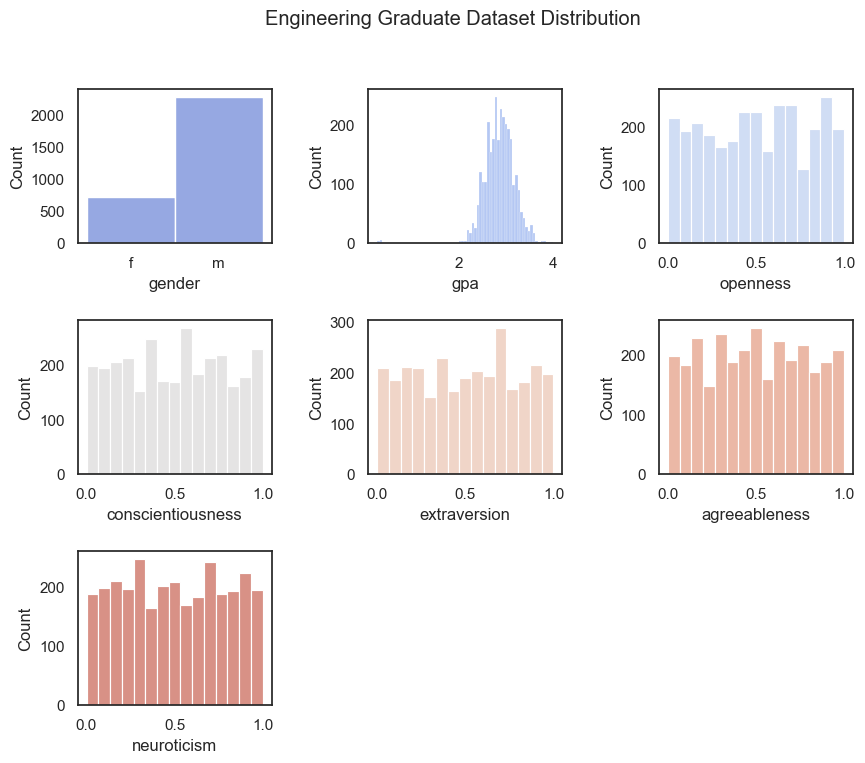

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Engineering Graduate Dataset Distribution')

palette = ['#c1d2f1', '#dddcdc', '#ecc7b6', '#e5a089', '#cc6c5e']
posistion = [axes[0][2], axes[1][0], axes[1][1], axes[1][2], axes[2][0]]

# Gender distribution
sns.histplot(data=engineering_df, x='gender', ax=axes[0][0], color='#738bd9')

# GPA distribution
sns.histplot(data=engineering_df, x='gpa', ax=axes[0][1], color='#9bb5f0')

# Big Five personalities distribution
for personality, axes_pos, color_plt in zip(BIG_FIVE, posistion, palette):
    sns.histplot(data=engineering_df, x=personality, ax=axes_pos, color=color_plt)

plt.show()

By examining a correlation matrix, we can pair column labels and observe their correlation coefficients. Looking at the correlations between `gpa`, there appears to be very weak correlations between any of the Big Five traits. 

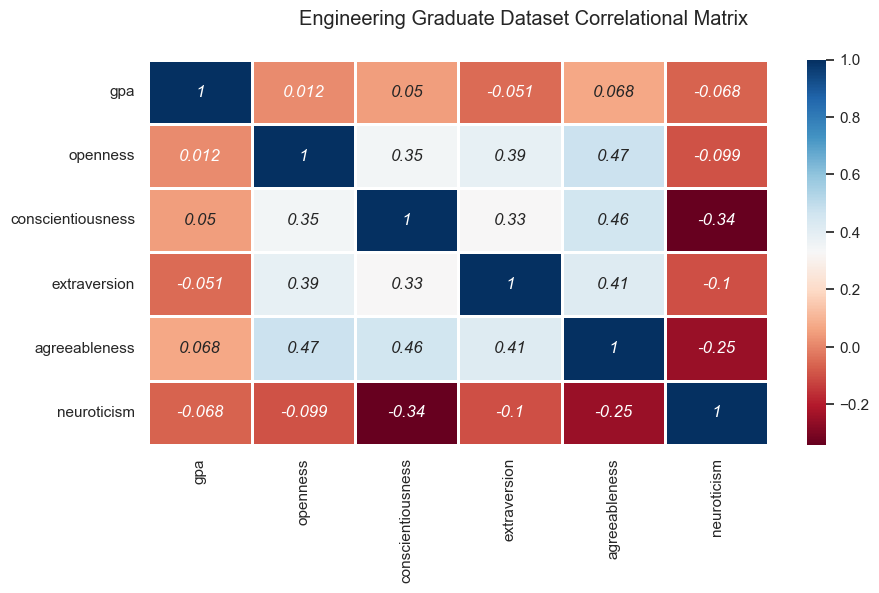

In [23]:
fig, axes = plt.subplots(figsize=(10, 5))
fig.suptitle('Engineering Graduate Dataset Correlational Matrix')

# Compute correlational matrix for quantitative labels
engineering_corr = engineering_df[['gpa']+BIG_FIVE]

engineering_corr = engineering_corr.corr()

# Plot correlational matrix
sns.heatmap(engineering_corr, cmap='RdBu', ax=axes, linewidths=1, annot=True, annot_kws={'fontstyle': 'italic'})

plt.show()

The respective correlation coefficients should reflect in the scatter plots against `gpa` below. The scatter plots does suggest a "zero" like relationship between `gpa` and each Big Five traits.

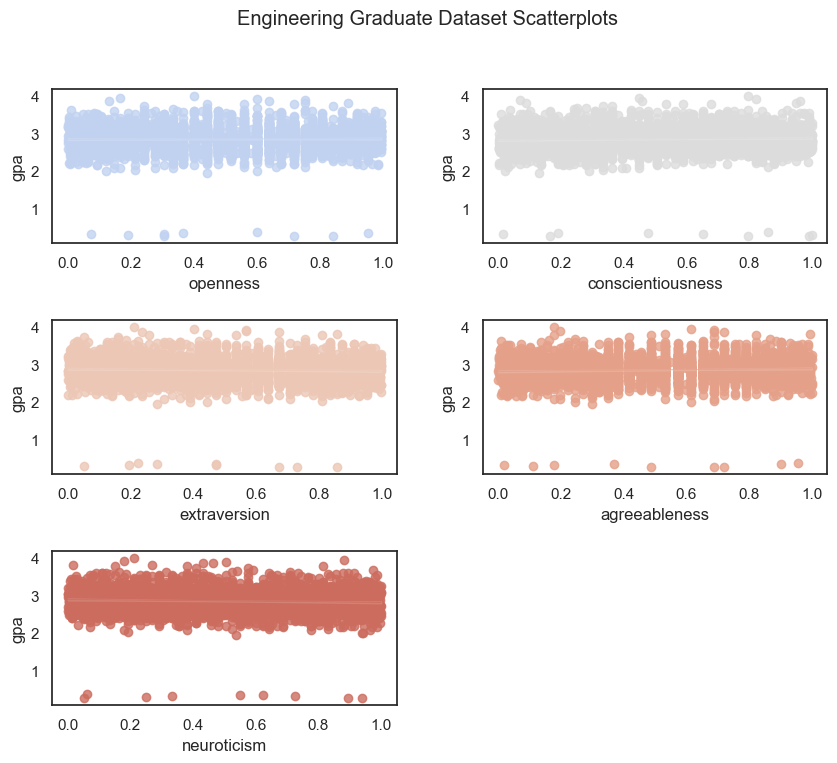

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
fig.delaxes(axes[2][1])
fig.subplots_adjust(hspace=0.5, wspace=0.25)
fig.suptitle('Engineering Graduate Dataset Scatterplots')

palette = ['#c1d2f1', '#dddcdc', '#ecc7b6', '#e5a089', '#cc6c5e']
posistion = [axes[0][0], axes[0][1], axes[1][0], axes[1][1], axes[2][0]]

# Big Five personalities scatterplots
for personality, axes_pos, color_plt in zip(BIG_FIVE, posistion, palette):
    sns.regplot(data=engineering_df, y='gpa', x=personality, ax=axes_pos, color=color_plt)

plt.show()

Although there is evidence to claim there is no correlation from direct analysis, it would be rash to exlcude the possibility of confounding variables. For example, whether the correlation of `gpa` and `conscientiousnes` is potentially affected by `agreeableness` or `gender`. To check for confounding variables for each Big Five personalities, we will create regression models with multiple predictor variables to control for confounding variables. We will then compare their respective linear coefficients with the 10% Rule for Confounding.


| Single Correlations                 | Multi Correlations                                       |
| :---------------------------------- | --------------------------------------------------------:|
| `openness` vs. `gpa`                | (`openness` and `conscientiousness`) vs. `gpa`           |
|                                     | (`openness` and `extraversion`) vs. `gpa`                |
|                                     | (`openness` and `agreeableness`) vs. `gpa`               |
|                                     | (`openness` and `neuroticism`) vs. `gpa`                 |
| `conscientiousness` vs. `gpa`       | (`conscientiousness` and `openess`) vs. `gpa`            |
|                                     | (`conscientiousness` and `extraversion`) vs. `gpa`       |
|                                     | (`conscientiousness` and `agreeableness`) vs. `gpa`      |
|                                     | (`conscientiousness` and `nueroticism`) vs. `gpa`        |
| `extraversion` vs. `gpa`            | (`extraversion` and `openess`) vs. `gpa`                 |
|                                     | (`extraversion` and `conscientiousness`) vs. `gpa`       |
|                                     | (`extraversion` and `agreeableness`) vs. `gpa`           |
|                                     | (`extraversion` and `nueroticism`) vs. `gpa`             |
| `agreeableness` vs. `gpa`           | (`agreeableness` and `openess`) vs. `gpa`                |
|                                     | (`agreeableness` and `conscientiousness`) vs. `gpa`      |
|                                     | (`agreeableness` and `extraversion`) vs. `gpa`           |
|                                     | (`agreeableness` and `nueroticism`) vs. `gpa`            |
| `neuroticism` vs. `gpa`             | (`neuroticism` and `openess`) vs. `gpa`                  |
|                                     | (`neuroticism` and `conscientiousness`) vs. `gpa`        |
|                                     | (`neuroticism` and `extraversion`) vs. `gpa`             |
|                                     | (`neuroticism` and `agreeableness`) vs. `gpa`            |

In [25]:
# One-hot encode gender values: (m=1, f=0)
engineering_df['gender'] = engineering_df['gender'].replace(['m', 'f'], [1, 0])

In [26]:
# Initialize linear regression model
reg = linear_model.LinearRegression()

In [27]:
# Convert data into arrays for easier use with sklearn
d_gpa = np.reshape(engineering_df.gpa.values, [len(engineering_df.gpa), 1])

d_openness = np.reshape(engineering_df.openness.values, [len(engineering_df.openness), 1])
d_conscientiousness = np.reshape(engineering_df.conscientiousness.values, [len(engineering_df.conscientiousness), 1])
d_extraversion = np.reshape(engineering_df.extraversion.values, [len(engineering_df.extraversion), 1])
d_agreeableness = np.reshape(engineering_df.agreeableness.values, [len(engineering_df.agreeableness), 1])
d_neuroticism = np.reshape(engineering_df.neuroticism.values, [len(engineering_df.neuroticism), 1])

d_gender = np.reshape(engineering_df.gender.values, [len(engineering_df.gender), 1])

In [28]:
# Create multi-correlation predictors (accounts for repeats)
variables = [d_openness, d_conscientiousness, d_extraversion, d_agreeableness, d_neuroticism, d_gender]
multi_variables = list(combinations(variables, 2))

Fitting a model with a single predictor should yield similar linear coefficients as the correlational coefficients in the heatmap. The model will be in this from, where `d2` is observed as `gpa` and  `d1` is observed as each Big Five personality. Our label of interest is `a1` which is the linear coefficient.

$$ d2 = a_0 + a_1 * d1 $$

In [29]:
# Single predictor
single_predictor = {feature: None for feature in BIG_FIVE+['gender']}

for variable, key in zip(variables, single_predictor.keys()):
    reg.fit(variable, d_gpa)
    single_predictor[key] = reg.coef_[0][0]
    
single_predictor

{'openness': 0.01310723349195556,
 'conscientiousness': 0.05611470658295506,
 'extraversion': -0.05769888468127069,
 'agreeableness': 0.07659463445641819,
 'neuroticism': -0.07654076993118686,
 'gender': -0.12876334294625655}

Linear coefficients for multiple predictors. The model will be in this from, where `d5` is observed as `gpa` and `d3` and `d4` is observed as a Big Five personality pair. Our label of interest is `a4` and `a5` which is the linear coefficients.

$$ d5 = a_3 + a_4 * d3 + a_5 * d4 $$

Our goal is to check if $a_4$ is within a 10% error of $a_1$. If not, then the Big Five personality pair is confounded when correlating against `gpa`

In [30]:
# Mutltiple predictor
multi_predictor = {feature_pair: None for feature_pair in combinations(BIG_FIVE+['gender'], 2)}

for variable_pair, key in zip(multi_variables, multi_predictor.keys()):
    reg.fit(np.hstack(variable_pair), d_gpa)
    multi_predictor[key] = [reg.coef_[0][0], reg.coef_[0][1]]
    
multi_predictor

{('openness', 'conscientiousness'): [-0.007120871084076362,
  0.058572774944901075],
 ('openness', 'extraversion'): [0.041629546780823014, -0.07378572223754196],
 ('openness', 'agreeableness'): [-0.029799955604762306, 0.09069198274030574],
 ('openness', 'neuroticism'): [0.005574901272351454, -0.07598851168782644],
 ('openness', 'gender'): [-0.004719665126311166, -0.12906189806323276],
 ('conscientiousness', 'extraversion'): [0.08386163556508926,
  -0.08505877082183243],
 ('conscientiousness', 'agreeableness'): [0.026820550703294397,
  0.06438775701119194],
 ('conscientiousness', 'neuroticism'): [0.03393304661251469,
  -0.0649549524256539],
 ('conscientiousness', 'gender'): [0.042182678597799984, -0.1266370562127486],
 ('extraversion', 'agreeableness'): [-0.10807314792192357,
  0.12143632351301822],
 ('extraversion', 'neuroticism'): [-0.0663915068102247, -0.08345403052816036],
 ('extraversion', 'gender'): [-0.05965329212059806, -0.12917681290869165],
 ('agreeableness', 'neuroticism'): [

We can prettify these numbers by categorizing them as a confounding variable or not using the 10% Rule for Confounding.

In [31]:
# Run 10% testing with expected coefficient from single variable prediction model
confounding_variables = {feature: [] for feature in BIG_FIVE+['gender']}

for feature in confounding_variables.keys():
    expected_coeff = single_predictor[feature]
    
    for feature_pair in multi_predictor.keys():
        if feature in feature_pair:
            coeff_index = feature_pair.index(feature)
            observed_coeff = multi_predictor[feature_pair]
            observed_coeff = observed_coeff[coeff_index]
            
            # Compute percentage difference, if >10% then it is a confounding variable
            difference = abs((expected_coeff - observed_coeff) / expected_coeff)
            confouding_variable = feature_pair[0 if coeff_index else 1]
            confounding_variables[feature] += [confouding_variable] if difference > 0.1 else []

In [32]:
for feature, confounding in confounding_variables.items():
    i = ', '.join(confounding) if confounding else 'none'
    print(f'{feature} confounds with: {i}')
    print('')

openness confounds with: conscientiousness, extraversion, agreeableness, neuroticism, gender

conscientiousness confounds with: extraversion, agreeableness, neuroticism, gender

extraversion confounds with: openness, conscientiousness, agreeableness, neuroticism

agreeableness confounds with: openness, conscientiousness, extraversion, neuroticism, gender

neuroticism confounds with: conscientiousness, agreeableness

gender confounds with: none



We observe that the relationship betweeen `gpa` and each Big Five traits is confounded with multiple personalities. These results would imply that a correlational analysis of `gpa` and any Big Five personality would require us controlling for confounding personalities and `gender`.

We can perform another regression analysis, an ordinary least squares, for each Big Five traits. However, it would be redundant to perform an analysis for each trait because they are confounded in a "chained" manner. 

For instance, if we perform an ordinary least squares for `conscientiousness` vs `gpa`, our model will be represented as,
```
patsy.dmatrices('gpa ~ conscientiousness').fit()
```

However, we would need to control for its confounding variables `agreeableness`, `extraversion`, `neuroticism`, `gender`
```
patsy.dmatrices('gpa ~ conscientiousness + agreeableness + extraversion + neuroticism + gender').fit()
```

Yet, for each confounding variable, we would need to control their confounding variables as well. Thus, the operation can be simplified to including all features as the independent variables.
```
patsy.dmatrices('gpa ~ conscientiousness + agreeableness + extraversion + nueroticism + openness + gender').fit()
```

In [33]:
independent_var = ' + '.join(BIG_FIVE) + ' + gender'
y_gpa, x_feature = patsy.dmatrices(f'gpa ~ {independent_var}', data=engineering_df)

# Fit ordinary least squares
results = sm.OLS(y_gpa, x_feature).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     21.84
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.90e-25
Time:                        22:46:14   Log-Likelihood:                -818.73
No. Observations:                2998   AIC:                             1651.
Df Residuals:                    2991   BIC:                             1693.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9917      0.024    123.722      0.000       2.944       3.039
openness             -0.0196      0.024     -0.822      0.411      -0.066       0.027
conscientiousness     0.0221      0.024      0.917      0.359      -0.025       0.069
extraversion         -0.1016      0.023     -4.407      0.000      -0.147      -0.056
agreeableness         0.0869      0.025      3.425      0.001       0.037       0.137
neuroticism          -0.0605      0.022     -2.796      0.005      -0.103      -0.018
gender               -0.1247      0.014     -9.073      0.000      -0.152      -0.098
==============================================================================
Omnibus:                     1098.767   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16936.798
Skew:                          -1.314   Prob(JB):                         0.00
Kurtosis:                      14.344   Cond. No.                         9.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the yielded p-values, we can conclude that if the p-value for a feature is less than `ALPHA` or 0.05, then its correlation coefficient is statistically significant.

In [34]:
significant = []
for feature, pvalue in zip(BIG_FIVE+['gender'], results.pvalues[1:]):
    significant += [feature] if pvalue < ALPHA else []

significant

['extraversion', 'agreeableness', 'neuroticism', 'gender']

<div class="alert alert-info">
Here we can conclude that <strong>extraversion</strong>, <strong>agreeableness</strong>, <strong>neuroticism</strong> personalities have coefficients of <strong>-0.1016</strong>, <strong>0.0869</strong>, and <strong>-0.0605</strong> respectively. Or in other words, strictly the <strong>extraversion</strong>, <strong>agreeableness</strong>, <strong>neuroticism</strong> personalities are not correlated to <strong>gpa</strong>.
</div>

Note: We cannot accept the respective OLS coefficients for the `conscientiousness` and `openness` personalities, nor can we accept that their is no/weak correlation with `gpa`.

## Part II: Independent EDA of Medical Students Dataset, `medical_df`

Get descriptive statistics for the quantitative variables using `describe()`. You will notice that the outputted quartiles is roughly distributed for the Big Five personality labels; this is the effect of mappinng the values into percentiles. 

In [35]:
medical_df.describe()

,gpa,openness,conscientiousness,extraversion,agreeableness,neuroticism
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,2.947329,0.501629,0.501629,0.501629,0.501629,0.501629
std,0.491315,0.288637,0.288699,0.288424,0.288481,0.288793
min,0.800000,0.004886,0.003257,0.003257,0.003257,0.003257
25%,2.615000,0.254072,0.270358,0.242671,0.267101,0.237785
50%,2.920000,0.535831,0.537459,0.501629,0.539088,0.472313
75%,3.315000,0.744300,0.736156,0.726384,0.728013,0.771987
max,3.950000,1.000000,0.993485,1.000000,0.996743,0.995114


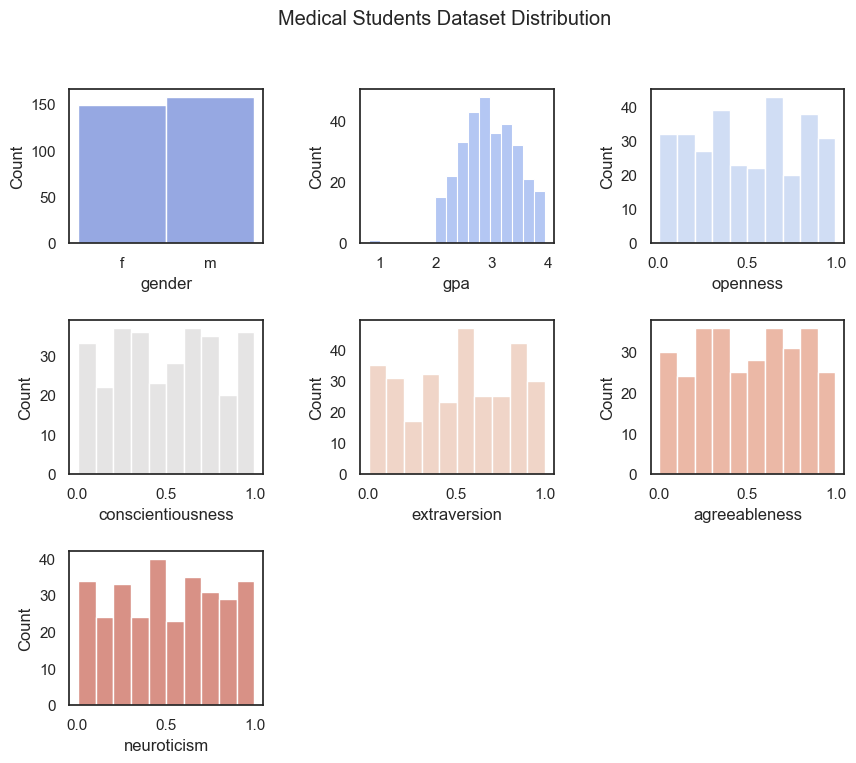

In [36]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Medical Students Dataset Distribution')

palette = ['#c1d2f1', '#dddcdc', '#ecc7b6', '#e5a089', '#cc6c5e']
posistion = [axes[0][2], axes[1][0], axes[1][1], axes[1][2], axes[2][0]]

# Gender distribution
sns.histplot(data=medical_df, x='gender', ax=axes[0][0], color='#738bd9')

# GPA distribution
sns.histplot(data=medical_df, x='gpa', ax=axes[0][1], color='#9bb5f0')

# Big Five personalities distribution
for personality, axes_pos, color_plt in zip(BIG_FIVE, posistion, palette):
    sns.histplot(data=medical_df, x=personality, ax=axes_pos, color=color_plt)

plt.show()

By examining a correlation matrix, we can pair column labels and observe their correlation coefficients. Looking at the correlations between `gpa`, there appears to be very weak correlations between any of the Big Five traits. 

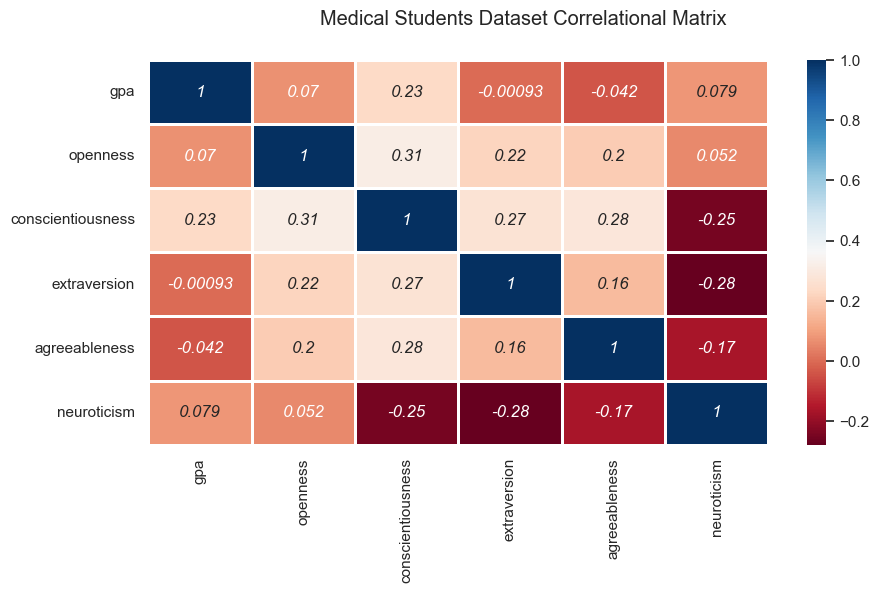

In [37]:
fig, axes = plt.subplots(figsize=(10, 5))
fig.suptitle('Medical Students Dataset Correlational Matrix')

# Compute correlational matrix for quantitative labels
medical_corr = medical_df[['gpa']+BIG_FIVE]

medical_corr = medical_corr.corr()

# Plot correlational matrix
sns.heatmap(medical_corr, cmap='RdBu', ax=axes, linewidths=1, annot=True, annot_kws={'fontstyle': 'italic'})

plt.show()

The respective correlation coefficients should reflect in the scatter plots against `gpa` below. The scatter plots does suggest a "zero" like relationship between `gpa` and each Big Five traits.

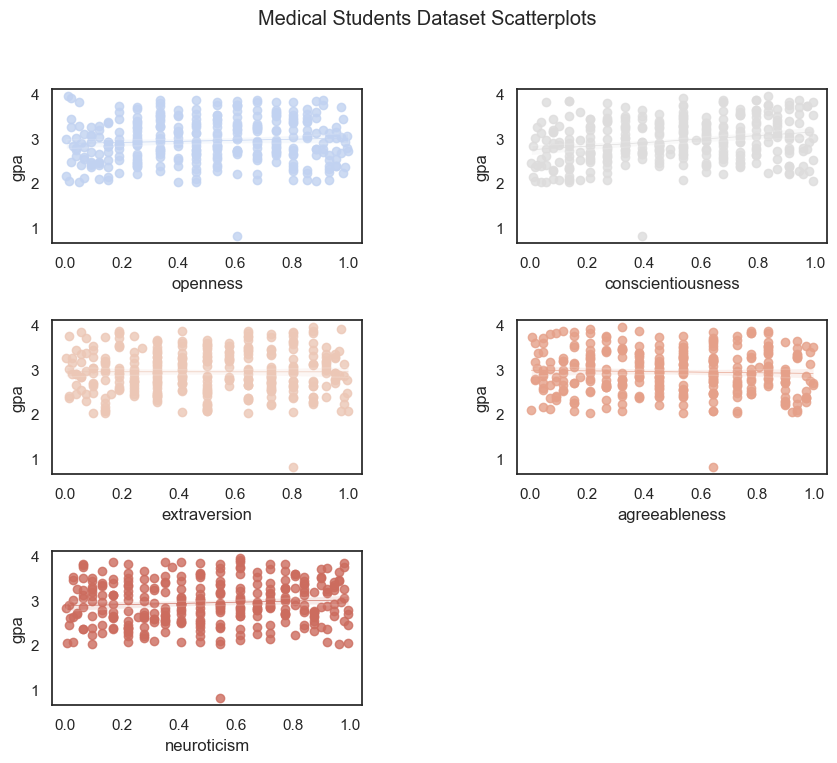

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
fig.delaxes(axes[2][1])
fig.subplots_adjust(hspace=0.5, wspace=0.25)
fig.suptitle('Medical Students Dataset Scatterplots')

palette = ['#c1d2f1', '#dddcdc', '#ecc7b6', '#e5a089', '#cc6c5e']
posistion = [axes[0][0], axes[0][1], axes[1][0], axes[1][1], axes[2][0]]

# Big Five personalities scatterplots
for personality, axes_pos, color_plt in zip(BIG_FIVE, posistion, palette):
    sns.regplot(data=medical_df, y='gpa', x=personality, ax=axes_pos, color=color_plt)

plt.show()

Similiarly we could claim that there is no correlation from direct analysis, but let us check for confounding variables for each Big Five personality using single and multi-variable regression models. We will then compare their respective linear coefficients with the 10% Rule for Confounding.

| Single Correlations                 | Multi Correlations                                       |
| :---------------------------------- | --------------------------------------------------------:|
| `openness` vs. `gpa`                | (`openness` and `conscientiousness`) vs. `gpa`           |
|                                     | (`openness` and `extraversion`) vs. `gpa`                |
|                                     | (`openness` and `agreeableness`) vs. `gpa`               |
|                                     | (`openness` and `neuroticism`) vs. `gpa`                 |
| `conscientiousness` vs. `gpa`       | (`conscientiousness` and `openess`) vs. `gpa`            |
|                                     | (`conscientiousness` and `extraversion`) vs. `gpa`       |
|                                     | (`conscientiousness` and `agreeableness`) vs. `gpa`      |
|                                     | (`conscientiousness` and `nueroticism`) vs. `gpa`        |
| `extraversion` vs. `gpa`            | (`extraversion` and `openess`) vs. `gpa`                 |
|                                     | (`extraversion` and `conscientiousness`) vs. `gpa`       |
|                                     | (`extraversion` and `agreeableness`) vs. `gpa`           |
|                                     | (`extraversion` and `nueroticism`) vs. `gpa`             |
| `agreeableness` vs. `gpa`           | (`agreeableness` and `openess`) vs. `gpa`                |
|                                     | (`agreeableness` and `conscientiousness`) vs. `gpa`      |
|                                     | (`agreeableness` and `extraversion`) vs. `gpa`           |
|                                     | (`agreeableness` and `nueroticism`) vs. `gpa`            |
| `neuroticism` vs. `gpa`             | (`neuroticism` and `openess`) vs. `gpa`                  |
|                                     | (`neuroticism` and `conscientiousness`) vs. `gpa`        |
|                                     | (`neuroticism` and `extraversion`) vs. `gpa`             |
|                                     | (`neuroticism` and `agreeableness`) vs. `gpa`            |

In [39]:
# One-hot encode gender values: (m=1, f=0)
medical_df['gender'] = medical_df['gender'].replace(['m', 'f'], [1, 0])

In [40]:
# Convert data into arrays for easier use with sklearn
d_gpa = np.reshape(medical_df.gpa.values, [len(medical_df.gpa), 1])

d_openness = np.reshape(medical_df.openness.values, [len(medical_df.openness), 1])
d_conscientiousness = np.reshape(medical_df.conscientiousness.values, [len(medical_df.conscientiousness), 1])
d_extraversion = np.reshape(medical_df.extraversion.values, [len(medical_df.extraversion), 1])
d_agreeableness = np.reshape(medical_df.agreeableness.values, [len(medical_df.agreeableness), 1])
d_neuroticism = np.reshape(medical_df.neuroticism.values, [len(medical_df.neuroticism), 1])

d_gender = np.reshape(medical_df.gender.values, [len(medical_df.gender), 1])

In [41]:
# Create multi-correlation predictors (accounts for repeats)
variables = [d_openness, d_conscientiousness, d_extraversion, d_agreeableness, d_neuroticism, d_gender]
multi_variables = list(combinations(variables, 2))

Fitting a model with a single predictor should yield similar linear coefficients as the correlational coefficients in the heatmap. The model will be in this from, where `d2` is observed as `gpa` and  `d1` is observed as each Big Five personality. Our label of interest is `a1` which is the linear coefficient.

$$ d2 = a_0 + a_1 * d1 $$

In [42]:
# Single predictor
single_predictor = {feature: None for feature in BIG_FIVE+['gender']}

for variable, key in zip(variables, single_predictor.keys()):
    reg.fit(variable, d_gpa)
    single_predictor[key] = reg.coef_[0][0]
    
single_predictor

{'openness': 0.11894343724124348,
 'conscientiousness': 0.39900962063084655,
 'extraversion': -0.001586720035279002,
 'agreeableness': -0.0717575126295505,
 'neuroticism': 0.13393829976797156,
 'gender': -0.09282219012828136}

Linear coefficients for multiple predictors. The model will be in this from, where `d5` is observed as `gpa` and `d3` and `d4` is observed as a Big Five personality pair. Our label of interest is `a4` and `a5` which is the linear coefficients.

$$ d5 = a_3 + a_4 * d3 + a_5 * d4 $$

Our goal is to check if $a_4$ is within a 10% error of $a_1$. If not, then the Big Five personality pair is confounded when correlating against `gpa`

In [43]:
# Mutltiple predictor
multi_predictor = {feature_pair: None for feature_pair in combinations(BIG_FIVE+['gender'], 2)}

for variable_pair, key in zip(multi_variables, multi_predictor.keys()):
    reg.fit(np.hstack(variable_pair), d_gpa)
    multi_predictor[key] = [reg.coef_[0][0], reg.coef_[0][1]]
    
multi_predictor

{('openness', 'conscientiousness'): [-0.006630205801699043,
  0.40108455914983926],
 ('openness', 'extraversion'): [0.12536282474946023, -0.02919362877465504],
 ('openness', 'agreeableness'): [0.1387030788689845, -0.09936869338604765],
 ('openness', 'neuroticism'): [0.11222765410770064, 0.12805909113902403],
 ('openness', 'gender'): [0.11084256372466882, -0.08948636664688954],
 ('conscientiousness', 'extraversion'): [0.4302473582944228,
  -0.11683743088894066],
 ('conscientiousness', 'agreeableness'): [0.45575674473476546,
  -0.20077002060184018],
 ('conscientiousness', 'neuroticism'): [0.4612846571304354,
  0.24915772588966875],
 ('conscientiousness', 'gender'): [0.40278254535335384, -0.09798058522742478],
 ('extraversion', 'agreeableness'): [0.010172399467775454,
  -0.07338683106008956],
 ('extraversion', 'neuroticism'): [0.03853830847510927, 0.1446046304254164],
 ('extraversion', 'gender'): [-0.0022994238785150555, -0.09282805052385984],
 ('agreeableness', 'neuroticism'): [-0.050962

We can prettify these numbers by categorizing them as a confounding variable or not using the 10% Rule for Confounding.

In [44]:
# Run 10% testing with expected coefficient from single variable prediction model
confounding_variables = {feature: [] for feature in BIG_FIVE+['gender']}

for feature in confounding_variables.keys():
    expected_coeff = single_predictor[feature]
    
    for feature_pair in multi_predictor.keys():
        if feature in feature_pair:
            coeff_index = feature_pair.index(feature)
            observed_coeff = multi_predictor[feature_pair]
            observed_coeff = observed_coeff[coeff_index]
            
            # Compute percentage difference, if >10% then it is a confounding variable
            difference = abs((expected_coeff - observed_coeff) / expected_coeff)
            confouding_variable = feature_pair[0 if coeff_index else 1]
            confounding_variables[feature] += [confouding_variable] if difference > 0.1 else []

In [45]:
for feature, confounding in confounding_variables.items():
    i = ', '.join(confounding) if confounding else 'none'
    print(f'{feature} confounds with: {i}')
    print('')

openness confounds with: conscientiousness, agreeableness

conscientiousness confounds with: agreeableness, neuroticism

extraversion confounds with: openness, conscientiousness, agreeableness, neuroticism, gender

agreeableness confounds with: openness, conscientiousness, neuroticism, gender

neuroticism confounds with: conscientiousness, gender

gender confounds with: neuroticism



We observe that the relationship betweeen `gpa` and each Big Five traits is confounded with multiple personalities. These results would imply that a correlational analysis of `gpa` and any Big Five personality would require us controlling for confounding personalities and `gender`.

In [46]:
y_gpa, x_feature = patsy.dmatrices(f'gpa ~ {independent_var}', data=medical_df)

# Fit ordinary least squares
results = sm.OLS(y_gpa, x_feature).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     5.110
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           5.15e-05
Time:                        22:46:15   Log-Likelihood:                -202.00
No. Observations:                 307   AIC:                             418.0
Df Residuals:                     300   BIC:                             444.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.7733      0.117     23.733      0.000       2.543       3.003
openness             -0.0095      0.102     -0.093      0.926      -0.211       0.192
conscientiousness     0.5206      0.106      4.927      0.000       0.313       0.729
extraversion         -0.0590      0.102     -0.579      0.563      -0.260       0.141
agreeableness        -0.1948      0.100     -1.941      0.053      -0.392       0.003
neuroticism           0.1779      0.106      1.686      0.093      -0.030       0.386
gender               -0.0861      0.057     -1.521      0.129      -0.198       0.025
==============================================================================
Omnibus:                        1.498   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.295
Skew:                          -0.153   Prob(JB):                        0.523
Kurtosis:                       3.087   Cond. No.                         9.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the yielded p-values, we can conclude that if the p-value for a feature is less than `ALPHA` or 0.05, then its correlation coefficient is statistically significant.

In [47]:
significant = []
for feature, pvalue in zip(BIG_FIVE+['gender'], results.pvalues[1:]):
    significant += [feature] if pvalue < ALPHA else []

significant

['conscientiousness']

<div class="alert alert-info">
Here we can conclude the <strong>conscientiousness</strong> personality has a coefficient of <strong>0.5206</strong>. Or in other words, strictly <strong>conscientiousness</strong> is moderately correlated to <strong>gpa</strong>.
</div>


## Part III: EDA of Engineering Graduates and Medical Students Dataset

We have two different datasets specifically for engineering and medical students. However, before we perform a side-by-side EDA of both datsets, we need to account for the different fields of study as well as their sample size difference. In this case, we will create a custom Big Five personality label for each observation.

Similar to a Myers–Briggs Type Indicator, we will create a label for an observation in both datasets like so,
1. High `openness` for `O` or low `openness` for `L`
2. High `conscientiousness` for `C` or low `conscientiousness` for `L`
3. High `extraversion` for `E` or low `extraversion` for `L`
4. High `agreeableness` for `A` or low `agreeableness` for `L`
5. High `neuroticism` for `N` or low `neuroticism` for `L`

Example, `OCLLN` would mean a high `openness`, `conscientiousness`, `neuroticism` and score, but a low `extraversion` and `agreeableness` score

In [48]:
# Yield `personality label` whether they are simply high or low in each of the Big 5 Traits
def big5type(row):
    personality = ''
    
    personality += 'O' if row['openness'] >= 0.6 else 'L'
    personality += 'C' if row['conscientiousness'] >= 0.6 else 'L'
    personality += 'E' if row['extraversion'] >= 0.6 else 'L'
    personality += 'A' if row['agreeableness'] >= 0.6 else 'L'
    personality += 'N' if row['neuroticism'] >= 0.6 else 'L'
    
    return personality

In [49]:
# Create a Big Five personality label for all engineering observations
engineering_df['label'] = engineering_df.apply(big5type, axis=1)

engineering_df.head()

,gender,gpa,openness,conscientiousness,extraversion,agreeableness,neuroticism,label
0,0,2.9528,0.637759,0.423115,0.912608,0.572048,0.622248,OLELN
1,1,2.6000,0.401935,0.877085,0.912608,0.416111,0.745163,LCELN
2,1,2.4776,0.365911,0.676451,0.957638,0.322382,0.455971,LCELL
3,1,3.2160,0.719646,0.306371,0.606071,0.486991,0.667445,OLELN
4,0,2.5720,0.599900,0.088893,0.125584,0.154436,0.591561,LLLLL


In [50]:
# Create a Big Five personality label for all medical observations
medical_df['label'] = medical_df.apply(big5type, axis=1)
medical_df.head()

,gender,gpa,openness,conscientiousness,extraversion,agreeableness,neuroticism,label
0,0,3.84,0.887622,0.136808,0.806189,0.153094,0.980456,OLELN
1,0,2.90,0.057003,0.452769,0.035831,0.838762,0.543974,LLLAL
2,0,2.57,0.677524,0.537459,0.726384,0.452769,0.472313,OLELL
3,0,2.58,0.068404,0.333876,0.324104,0.043974,0.350163,LLLLL
4,0,3.65,0.744300,0.793160,0.324104,0.941368,0.543974,OCLAL


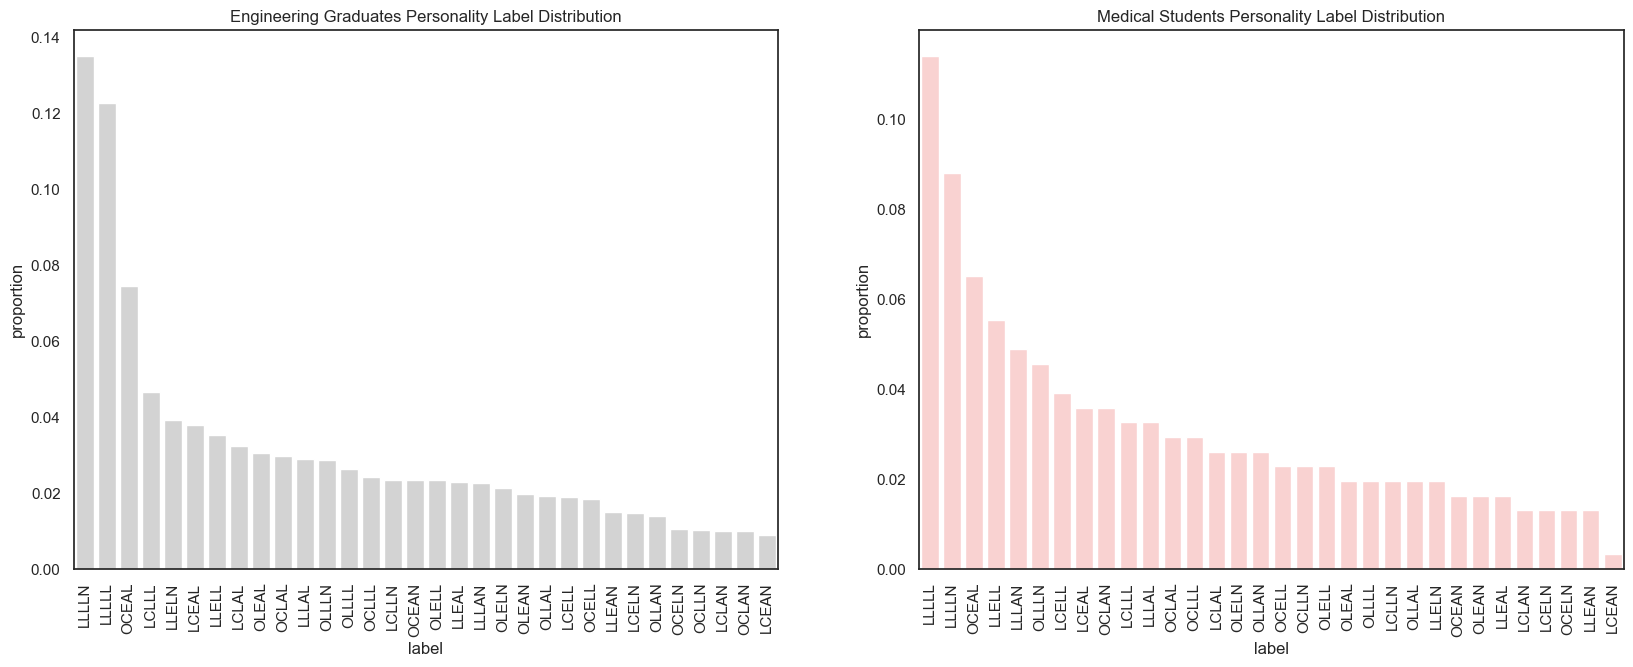

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Engineering personality label count distribution
engineering_label_count = engineering_df['label'].value_counts(normalize=True)
plt1 = sns.barplot(x=engineering_label_count.index, y=engineering_label_count, ax=axes[0], color='#D3D3D3')
plt1.set(title='Engineering Graduates Personality Label Distribution', xlabel='label', ylabel='proportion')
plt1.tick_params(axis='x', rotation=90)

# Medical personality label count distribution
medical_label_count = medical_df['label'].value_counts(normalize=True)
plt2 = sns.barplot(x=medical_label_count.index, y=medical_label_count, ax=axes[1], color='#FFCCCB')
plt2.set(title='Medical Students Personality Label Distribution',  xlabel='Label', ylabel='proportion')
plt2.tick_params(axis='x', rotation=90)

plt.show()

Display all possible and unique Big Five personality `labels`

In [52]:
BIG_FIVE_LABELS = medical_df['label'].unique()

BIG_FIVE_LABELS

array(['OLELN', 'LLLAL', 'OLELL', 'LLLLL', 'OCLAL', 'OLLLN', 'OCEAN',
       'OCELL', 'OCLAN', 'OCEAL', 'LLELN', 'OCLLN', 'LLLAN', 'OLLAN',
       'LLLLN', 'OLEAL', 'LLELL', 'LCLLL', 'LCLAL', 'OLLAL', 'LCLAN',
       'LCEAL', 'OCLLL', 'LCLLN', 'LCELL', 'OLLLL', 'OLEAN', 'LCELN',
       'LLEAL', 'LCEAN', 'OCELN', 'LLEAN'], dtype=object)

For each dataset, we can individually look for specific personality labels that may have a greater correlation with `gpa`. Starting with the engineering graduates dataset, we observe that `OCLAL` has the highest correlation of `0.0922`.

<div class="alert alert-info">
In other words, within the engineering dataset population, a high <strong>openness</strong>, <strong>conscientiousness</strong>, and <strong>agreeableness</strong> score but a low <strong>extraversion</strong> and <strong>neuroticism</strong> is the most optimal personality label to correlate or predict <strong>gpa</strong> performance. 
</div>

In [58]:
y_gpa, x_label = patsy.dmatrices('gpa ~ label', data=engineering_df)
mod_label = sm.OLS(y_gpa, x_label)

# Fit ordinary least squares
results = mod_label.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.813
Date:                Thu, 23 Mar 2023   Prob (F-statistic):            0.00392
Time:                        22:46:27   Log-Likelihood:                -854.86
No. Observations:                2998   AIC:                             1774.
Df Residuals:                    2966   BIC:                             1966.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.8731      0.030     94.814      0.000       2.814       2.933
label[T.LCEAN]    -0.1141      0.069     -1.647      0.100      -0.250       0.022
label[T.LCELL]    -0.0474      0.052     -0.904      0.366      -0.150       0.055
label[T.LCELN]    -0.0393      0.057     -0.684      0.494      -0.152       0.073
label[T.LCLAL]     0.0458      0.045      1.025      0.306      -0.042       0.133
label[T.LCLAN]     0.0686      0.066      1.033      0.302      -0.062       0.199
label[T.LCLLL]     0.0208      0.041      0.508      0.611      -0.059       0.101
label[T.LCLLN]     0.0254      0.049      0.518      0.605      -0.071       0.122
label[T.LLEAL]     0.0245      0.049      0.496      0.620      -0.072       0.121
label[T.LLEAN]    -0.0102      0.057     -0.179      0.858      -0.122       0.101
label[T.LLELL]    -0.0432      0.044     -0.990      0.322      -0.129       0.042
label[T.LLELN]    -0.0882      0.042     -2.077      0.038      -0.172      -0.005
label[T.LLLAL]     0.0135      0.046      0.293      0.770      -0.077       0.104
label[T.LLLAN]     0.0572      0.050      1.154      0.249      -0.040       0.154
label[T.LLLLL]    -0.0121      0.035     -0.349      0.727      -0.080       0.056
label[T.LLLLN]    -0.0460      0.034     -1.340      0.180      -0.113       0.021
label[T.OCEAL]     0.0232      0.037      0.623      0.533      -0.050       0.096
label[T.OCEAN]    -0.0718      0.049     -1.461      0.144      -0.168       0.025
label[T.OCELL]    -0.0493      0.053     -0.927      0.354      -0.153       0.055
label[T.OCELN]    -0.0664      0.065     -1.026      0.305      -0.193       0.061
label[T.OCLAL]     0.0922      0.046      2.015      0.044       0.002       0.182
label[T.OCLAN]    -0.0539      0.066     -0.812      0.417      -0.184       0.076
label[T.OCLLL]    -0.0117      0.048     -0.241      0.810      -0.107       0.083
label[T.OCLLN]     0.0081      0.066      0.124      0.901      -0.120       0.137
label[T.OLEAL]    -0.0040      0.045     -0.089      0.929      -0.093       0.085
label[T.OLEAN]    -0.1117      0.052     -2.152      0.031      -0.213      -0.010
label[T.OLELL]     0.0355      0.049      0.722      0.470      -0.061       0.132
label[T.OLELN]    -0.0246      0.051     -0.486      0.627      -0.124       0.075
label[T.OLLAL]     0.0464      0.052      0.890      0.374      -0.056       0.149
label[T.OLLAN]    -0.0921      0.058     -1.576      0.115      -0.207       0.022
label[T.OLLLL]    -0.0210      0.047     -0.444      0.657      -0.114       0.072
label[T.OLLLN]    -0.0281      0.046     -0.609      0.542      -0.119       0.062
==============================================================================
Omnibus:                     1052.376   Durbin-Watson:                   1.974
Prob(Omnibus):      

Likewise with the medical students dataset, we see that `LCELN` has the highest correlation of `0.4118`.

<div class="alert alert-info">
In other words, within the engineering dataset population, a high <strong>conscientiousness</strong>, <strong>extraversion</strong>, and <strong>neuroticism</strong> score but a low <strong>openness</strong> and <strong>agreeableness</strong> is the most optimal personality label to correlate or predict <strong>gpa</strong> performance. 
</div>

In [54]:
y_gpa, x_label = patsy.dmatrices('gpa ~ label', data=medical_df)
mod_label = sm.OLS(y_gpa, x_label)

# Fit ordinary least squares
results = mod_label.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.253
Date:                Thu, 23 Mar 2023   Prob (F-statistic):              0.175
Time:                        22:46:16   Log-Likelihood:                -196.66
No. Observations:                 307   AIC:                             457.3
Df Residuals:                     275   BIC:                             576.6
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.0582      0.146     20.907      0.000       2.770       3.346
label[T.LCEAN]    -0.0382      0.507     -0.075      0.940      -1.036       0.959
label[T.LCELL]    -0.0990      0.203     -0.489      0.625      -0.498       0.300
label[T.LCELN]     0.4118      0.283      1.454      0.147      -0.146       0.969
label[T.LCLAL]    -0.1044      0.225     -0.463      0.644      -0.548       0.339
label[T.LCLAN]    -0.0632      0.283     -0.223      0.824      -0.621       0.494
label[T.LCLLL]    -0.0492      0.212     -0.232      0.817      -0.466       0.368
label[T.LCLLN]     0.1835      0.246      0.745      0.457      -0.301       0.668
label[T.LLEAL]    -0.3782      0.262     -1.445      0.150      -0.893       0.137
label[T.LLEAN]    -0.1357      0.283     -0.479      0.632      -0.693       0.422
label[T.LLELL]    -0.0894      0.188     -0.476      0.634      -0.459       0.280
label[T.LLELN]    -0.2132      0.246     -0.866      0.387      -0.698       0.272
label[T.LLLAL]    -0.3192      0.212     -1.506      0.133      -0.736       0.098
label[T.LLLAN]    -0.1355      0.193     -0.704      0.482      -0.515       0.244
label[T.LLLLL]    -0.2562      0.168     -1.528      0.128      -0.586       0.074
label[T.LLLLN]    -0.1723      0.174     -0.993      0.322      -0.514       0.169
label[T.OCEAL]    -0.2302      0.182     -1.264      0.207      -0.589       0.128
label[T.OCEAN]    -0.1482      0.262     -0.566      0.572      -0.663       0.367
label[T.OCELL]    -0.0325      0.235     -0.138      0.890      -0.494       0.429
label[T.OCELN]     0.2593      0.283      0.915      0.361      -0.298       0.817
label[T.OCLAL]     0.1452      0.218      0.666      0.506      -0.284       0.574
label[T.OCLAN]     0.1036      0.207      0.501      0.617      -0.304       0.511
label[T.OCLLL]     0.0263      0.218      0.120      0.904      -0.403       0.456
label[T.OCLLN]     0.0190      0.235      0.081      0.936      -0.443       0.481
label[T.OLEAL]    -0.7348      0.246     -2.985      0.003      -1.220      -0.250
label[T.OLEAN]     0.1098      0.262      0.420      0.675      -0.405       0.625
label[T.OLELL]    -0.1796      0.235     -0.766      0.444      -0.641       0.282
label[T.OLELN]     0.1131      0.225      0.502      0.616      -0.331       0.557
label[T.OLLAL]    -0.2098      0.246     -0.852      0.395      -0.695       0.275
label[T.OLLAN]    -0.0632      0.225     -0.280      0.779      -0.507       0.381
label[T.OLLLL]     0.0668      0.246      0.271      0.786      -0.418       0.552
label[T.OLLLN]    -0.1860      0.195     -0.952      0.342      -0.571       0.199
==============================================================================
Omnibus:                        3.923   Durbin-Watson:                   2.017
Prob(Omnibus):      

For each observation, we can visualize the expected `gpa` for each personality labels as well as their max, min, and median `gpa`. For the engineering graduate plot, the `OCLAL` label has the highest average `gpa`. For the medical students plot, the `LCELN` label has the highest average `gpa`. In other words, in the larger population, individuals with a `OCLAL` and `LCELN` personality label may necessarily academically perform better than any other individual.

In [55]:
# Generate data of average, median, max, min for each label given a dataframe
def generate_label_data(df):
    global BIG_FIVE_LABELS
    
    label_data = {'label': BIG_FIVE_LABELS, 'avg': [], 'median': [], 'max': [], 'min': []}
    
    for label in BIG_FIVE_LABELS:
        label = df['label'] == label
        gpa_data = df[label]['gpa']
        
        label_data['avg'].append(gpa_data.mean())
        label_data['median'].append(gpa_data.median())
        label_data['max'].append(gpa_data.max())
        label_data['min'].append(gpa_data.min())
    
    return pd.DataFrame.from_dict(label_data)

engineering_label_data = generate_label_data(engineering_df).set_index('label')
medical_label_data = generate_label_data(medical_df).set_index('label')

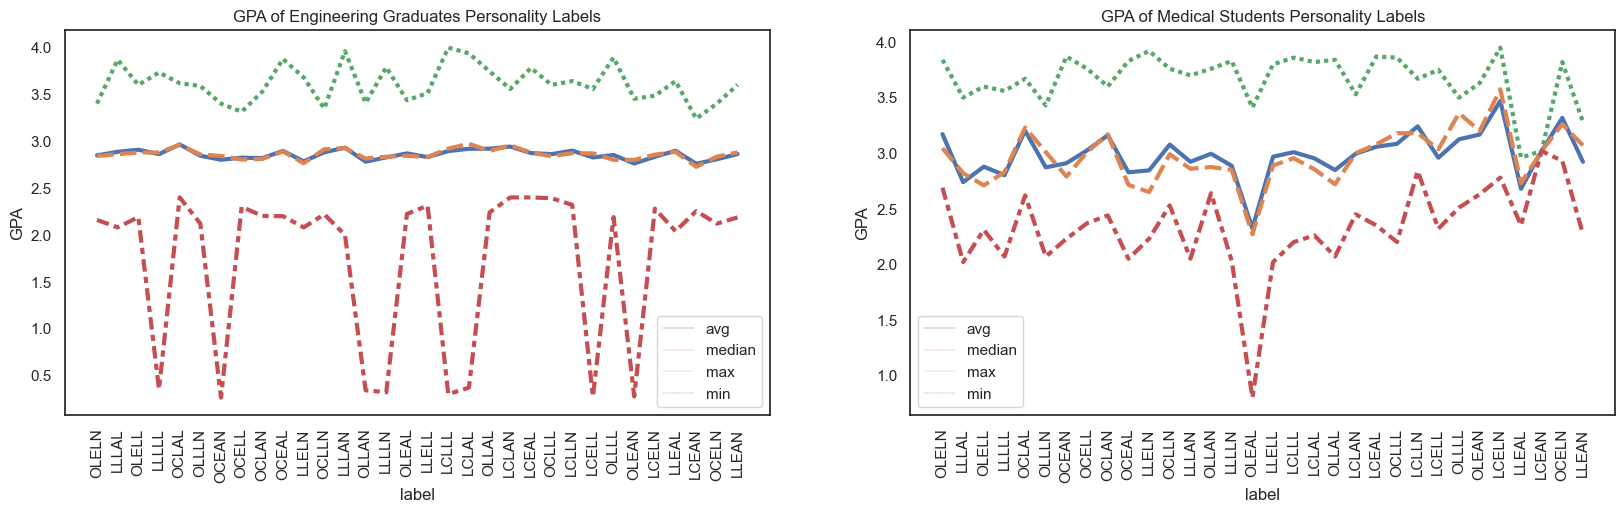

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.subplots_adjust(wspace=0.2)

# Engineering_label_data
plt1 = sns.lineplot(data=engineering_label_data, ax=axes[0], linewidth=3)
plt1.set(title='GPA of Engineering Graduates Personality Labels', xlabel='label', ylabel='GPA')
plt1.tick_params(axis='x', rotation=90)

# Medical_label_data
plt2 = sns.lineplot(data=medical_label_data, ax=axes[1], linewidth=3)
plt2.set(title='GPA of Medical Students Personality Labels', xlabel='Label', ylabel='GPA')
plt2.tick_params(axis='x', rotation=90)

plt.show()

Closely observe the average `gpa` for each personality labels within the engineering and medical datasets below. From the plot, we expect that medical students may outperform engineering graduates, yet this could be explained by a smaller sample size resulting more variation as shown. A large sample size, like the engineering dataset, yields a stable plot. However, to account for the sample size difference, we are observing the average `gpa`, conditionally concluding that the field of study could be a factor when anlyzing if there are correlations between Big Five traits and academic performance.

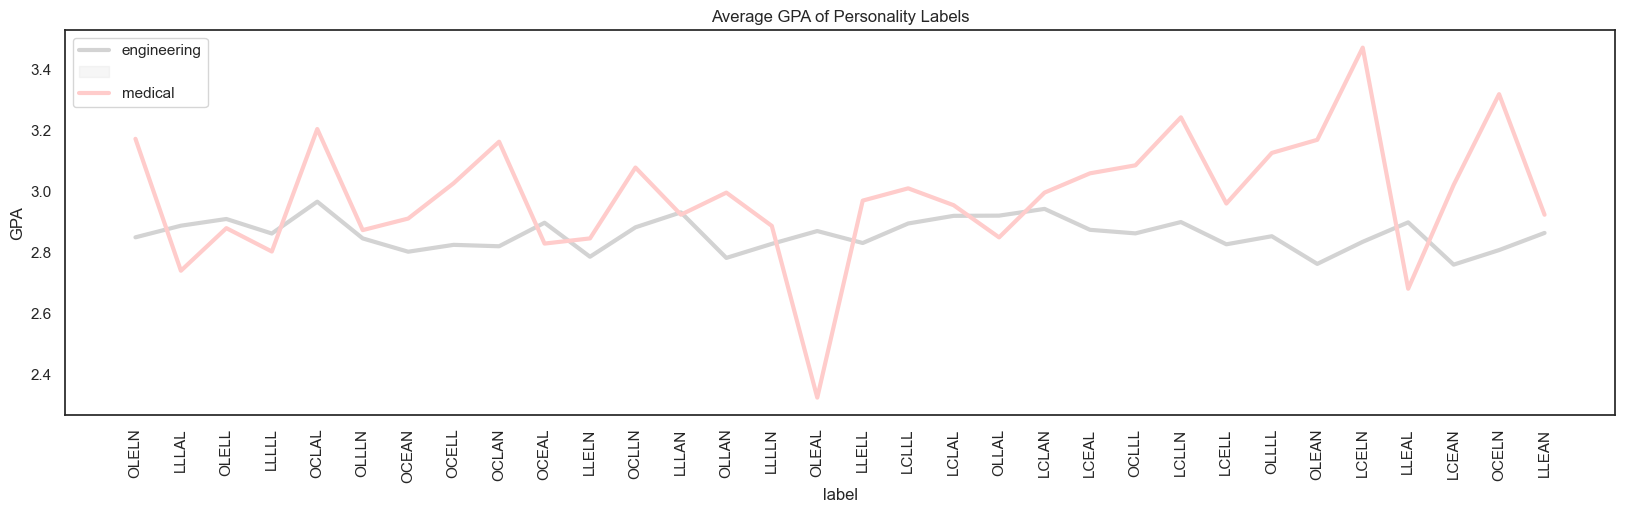

In [57]:
fig, axes = plt.subplots(figsize=(20, 5))

# Plot average GPA for personality labels from both datasets
plt1 = sns.lineplot(x=engineering_label_data.index, y='avg', data=engineering_label_data, ax=axes, linewidth=3, color='#D3D3D3')
plt2 = sns.lineplot(x=medical_label_data.index, y='avg', data=medical_label_data, ax=axes, linewidth=3, color='#FFCCCB')

plt1.set(title='Average GPA of Personality Labels', xlabel='Label', ylabel='GPA')
plt1.tick_params(axis='x', rotation=90)
axes.legend(['engineering', '', 'medical'])

plt.show()

# Ethics & Privacy

Our project used datasets pertaining to students' academic performances, specifically on GPA, and their respective Big Five personality scores. All of our datasets were found publicly on Kaggle, a specialized Data Science community that caters to publishing as public datasets, and through research papers via Google Scholar. Some limitations or biases of our selected datasets is that it is exclusive to the population of students within the engineering and medical field. According to the [AMCAT's portal](https://www.myamcat.com/help/amcat-scores-and-results/scores) Big Five scores are determined on percentile, as there is canonically no scaling for Big Five scores. There are potential privacy concerns for those who view our project and want to access the datasets that we used. While the latter dataset is anonymous, the *Engineering Graduate Dataset* does contain personal information, such as school college ID, gender, date of bith, etc.

Even for anonymous data, although their names are not included, this carries the risk of entities being potentially able to search for publically available data that the individual chooses to release, such as gpa and alma mater found on a resume that contains the name of that person, in order to match the person. While this may allow compananies to know more about a job applicant, for example, it may also be used maliciously to discriminate people based on their supposed personality traits. This again emphasizes the dual nature of the power of data.

# Conclusion & Discussion

## Conclusion of Interpretations and Analysis

Upon our analysis using the datasets we collected, we were able to draw the conclusion that specific traits among the Big Five conditionally have no correlation to academic performance. We were also able to conclude that specific Big Five types have a higher correlation to academic performance than others. As a measure of academic performance, we used students' GPA collected from our datasets and later rescaled. To quantify the Big Five traits, the datasets yielded Big Five personality scores that were wrangled and mapped as percentiles relative to the dataset populations.

Firstly, the analysis we performed suggested that the field of study may be a confounding variable; therefore, the conclusions we draw are conditional to a specific dataset/student. We observed that strictly the *conscientiousness*, *extraversion*, *agreeableness*, and *neuroticism* traits have either no or moderate correlation to GPA. Specifically to the (dataset) population of engineering students, the *extraversion*, *agreeableness*, and *neuroticism* traits have zero/no correlation to GPA, yielding a correlation coefficient of *-0.1016*, *0.0869*, and *-0.0605* respectively. Likewise, specifically to the (dataset) population of medical students, the *conscientiousness* trait is moderately and positively correlated to GPA, yielding a correlation coefficient of *0.5206*. 

The Exploratory Data Analysis we performed intially was running a (single-independent variable) correlational analysis of each Big Five personality trait against GPA. For both datasets, we noticed significantly low correlation coefficents from generated heatmaps and regression plots. In consequence, we considered the suspicions of whether another Big Five trait influences the correlation of GPA to obtain a more accurate correlation coefficient. To assess this, we ran a multi-independent variable correlational analysis for each Big Five personality trait and compared the correlation coefficients for a multi-variable with the correlation coefficients for a single-variable. Using the 10% Rule of Confounding, we check whether the multi-variable correlation coefficient is within a 10% error of the single-variable, if not then the respective Big Five personality trait is confounded with the traits that were also fed into the multi-variable correlational analysis. As a result, we found that all of the Big Five traits were connectively confounded with each other.

Our reformed approach to our EDA for both datasets was conducting a multi-independent variable correlational analysis with all the Big Five personalities as weights. We utlilized statsmodels' OLS regression model function to generate a more accurate correlation coefficient for each trait. From the statsmodels' outputted OLS Regression Results, we were able to obtain new correlation coefficients along with p-values. Using an alpha value of *0.05*, we accepted the correlation coefficients of traits that were below this threshold, in this case *extraversion* of *-0.1016*, *agreeableness* of *0.0869*, and *neuroticism of *-0.0605* for the engineering student dataset and *conscientiousness* of *0.5206* for the medical student dataset. From this, we can conclude that exclusively the *extraversion*, *agreeableness*, and *neuroticism* traits have zero/no correlation to GPA, and the *conscientiousness* trait is moderately correlated to GPA.

We further analyzed our datasets by looking specifically at a Big Five "type" and which type is most correlated to GPA. Specifically, for each observation in our datasets, we created a labeling convention for a Big Five type. The initial of each trait represenents a "high" score and the letter "L" represents a "low" score. For example, *OCLLN* would mean a high openness, conscientiousness, neuroticism and score, but a low extraversion and agreeableness score. In our analysis, we found a *OCLAL* type (yielded from the engineering student dataset) and *LCELN* type (yielded from the medical student dataset) were most correlated to GPA relative to their dataset population. They had coefficients of *0.0922* and *0.4118* respectively. From this, we can conditionally conclude that although the *OCLAL* type has zero/no correlation to GPA, it is the most correlated to GPA compared to others within their dataset population. Likewise, the *LCELN* type is moderately correlated and the most correlated to GPA compared to others within their dataset population.

## Limitations & Moving Forward

One major limitation to our study is that our findings cannot be generalized to students of different study. Unfortunately, the datasets we collected we either purely of student respondents of an engineering or medical background. Another presented limitation was the limited amount of observations in the medical student dataset, hindering our side-by-side EDA with the engineering student dataset. For instance, this led to more variance in our Big Five typing plots.

Moving forward, we would like to come back and run our study with larger and diverse datasets so that we can generalize our findings for many students. We believe that a better dataset may refine our conclusions so that they are more consistent with other studies.

Maybe we can consider a more wide ranging measure of "success" for our dependent variable, besides GPA
- Wealth: would apply to individuals outside of school, but not children
- IQ test score: would apply to all ages
- Life Happiness Score: would apply to all ages

# Team Contributions

- Ben Liou: Finding Datasets, EDA, Ethics & Privacy, Video Presentation
- Fanqi Lin: Proposal, EDA, Overview & Background, EDA 
- Tasnia Jamal: Overview & Background, EDA, Conclusion, Video Presentation
- Kendrick Nguyen: Finding Datasets, Dataset Cleaning, EDA, Video Presentation